In [6]:
import github_fetching as fetcher
import data_cleaning as cleaner
import sentiment_analysis as analyzer
import visualization as visualizer
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame

In [7]:
xz_folder = 'tukaani-project_xz/'

In [8]:
issue_pr_location = fetcher.fetch_issues_pr(folder_location = xz_folder)
cleaner.clean_thread(issue_pr_location)

Fetching Issues and PRs for tukaani-project/xz

Total 45 issue fetched

Total 40 pr fetched

Data Cleaning in Progress

Total 85 files cleaned



In [9]:
contribution_df = cleaner.calculate_author_contributions()
print(contribution_df.describe())
contribution_df

              count
count    178.000000
mean     371.915730
std     1452.190891
min        1.000000
25%       20.000000
50%       65.000000
75%      226.000000
max    14968.000000


,from,count
10,Larhzu,14968
41,JiaT75,11517
149,hansjans162,2714
168,skosukhin,2614
75,abcfy2,1870
...,...,...
121,Kamillaova,1
143,vtorri,1
141,AlejandroBarreda,1
131,CaptainFallaway,1


In [10]:
post_sentiment_results = analyzer.post_sentiment_analysis()

Running post-level sentiment analysis...
Post-level sentiment analysis done on 85 posts.


In [11]:
user_interactions = analyzer.sentence_sentiment_analysis()

Running sentence-level sentiment analysis...
Sentence-level sentiment analysis done on 85 posts.

Now cleaning user interactions...
Done cleaning for user interactions
Now fetching GitHub usernames
Error: Unable to fetch data for username 'mvatsyk'. Status code: 404
Error: Unable to fetch data for username '57464bb4ebd6c0'. Status code: 404
Error: Unable to fetch data for username 'XZ_5'. Status code: 404
Error: Unable to fetch data for username 'mvatsyk'. Status code: 404
Error: Unable to fetch data for username 'lists'. Status code: 404
Error: Unable to fetch data for username 'XZ_5'. Status code: 404
Error: Unable to fetch data for username 'BAR_1'. Status code: 404
Error: Unable to fetch data for username 'XZ_5'. Status code: 404
Error: Unable to fetch data for username 'awork3'. Status code: 404
Error: Unable to fetch data for username 'XZ_5'. Status code: 404
Error: Unable to fetch data for username 'lzma_decode'. Status code: 404
Error: Unable to fetch data for username 'vfazio2

In [12]:
user_interactions = pd.DataFrame(user_interactions)
graph_path = visualizer.generate_network(xz_folder, user_interactions, 'network_graph.html', 1)

Network saved to tukaani-project_xz/network_graph.html


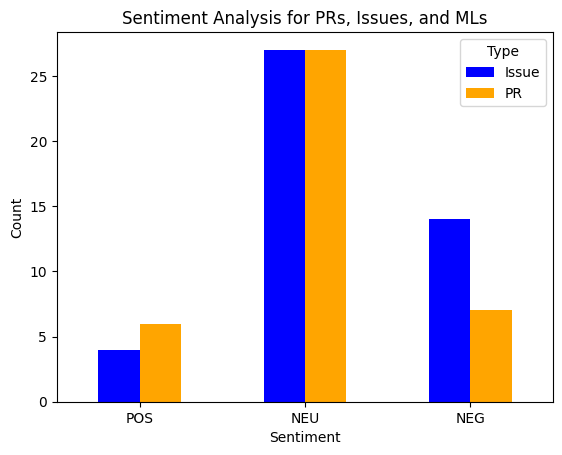

In [13]:
visualizer.post_analysis_visualization(post_sentiment_results)

In [14]:
visualizer.show_graph(graph_path)

In [15]:
commit_df = fetcher.fetch_commit_info(folder_location = xz_folder)
top_committers = fetcher.get_top_committers(commit_df)

Filtered commits saved to tukaani-project_xz/commits_info.csv


In [16]:
top_committers

,author_name,commit_count
21,Lasse Collin,865
17,Jia Tan,450
26,Sam James,14
22,Maksym Vatsyk,5
13,Hans Jansen,5
19,Kelvin Lee,5
18,Julien Marrec,3
11,Gabriela Gutierrez,3
5,Bjarni Ingi Gislason,3
20,Kian-Meng Ang,2


In [17]:
sentiment_df = analyzer.track_sentiment_given_and_received(user_interaction_df=user_interactions)

In [18]:
threat_df = analyzer.identify_threat(sentiment_df, top_committers)

In [19]:
threat_df

,user,sentiment_received,sentiment_given,commit_count
6,Sam James,-0.069806,-0.091606,14
5,Lasse Collin,0.166472,0.065690,865
2,Jia Tan,0.221388,0.363748,450
3,Kelvin Lee,0.303849,0.159459,5
4,Kian-Meng Ang,0.335396,0.291878,2


In [20]:
sentiment_df = sentiment_df[['user', 'sentiment_received', 'sentiment_given']]

In [21]:
sentiment_df

,user,sentiment_received,sentiment_given
0,57464bb4ebd6c0,-0.125374,0.000000
1,Abdurrahim Cakar,-0.069116,0.000000
2,Aeterne Satiatus,-0.071130,-0.262508
3,Agostino Sarubbo,-0.147563,-0.351754
4,Alcaro,-0.612008,-0.084132
...,...,...,...
94,wmjb,-0.708014,0.000000
95,xodiumluma,-0.202941,0.580213
96,ნიკა,0.288961,0.424038
97,めら,0.078762,0.000000


In [22]:
top_committers

,author_name,commit_count
21,Lasse Collin,865
17,Jia Tan,450
26,Sam James,14
22,Maksym Vatsyk,5
13,Hans Jansen,5
19,Kelvin Lee,5
18,Julien Marrec,3
11,Gabriela Gutierrez,3
5,Bjarni Ingi Gislason,3
20,Kian-Meng Ang,2
